In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Toxic_tweets\\FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


Preprocessing:
Before converting the text to a Bag of Words or TF-IDF representation, you need to perform some basic preprocessing steps such as lowercasing, tokenization, and removing stopwords, punctuation, and special characters. Additionally, you may want to handle any missing values in the dataset.

In [3]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Lowercase the text
df['tweet'] = df['tweet'].str.lower()

# Remove URLs
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))

# Remove special characters and punctuation
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

# Tokenization and remove stopwords
stop_words = set(stopwords.words('english'))
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Handle missing values if any
df.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['Toxicity'], test_size=0.2, random_state=42)


In [5]:
# Convert Text to Bag of Words: Now, you can convert the preprocessed text data to a Bag of Words representation using CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer_bow = CountVectorizer()

# Fit and transform the training data
X_train_bow = vectorizer_bow.fit_transform(X_train)

# Transform the testing data
X_test_bow = vectorizer_bow.transform(X_test)


In [6]:
#Convert Text to TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer_tfidf.transform(X_test)



Now you have the Bag of Words (X_train_bow, X_test_bow) and TF-IDF (X_train_tfidf, X_test_tfidf) representations of the tweet text data. You can use these features to build your toxicity prediction model using any appropriate machine learning algorithm, such as Logistic Regression, Random Forest, or a deep learning model like LSTM.

Remember to preprocess the text in the same way for any new data you want to make predictions on. Also, keep in mind that this is just a basic approach, and you may want to further tune your preprocessing and model parameters to achieve better results.

In [7]:
# Decision Trees:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model using the Bag of Words features
dt_classifier.fit(X_train_bow, y_train)

# Make predictions on the test data
y_pred_dt_bow = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_dt_bow = accuracy_score(y_test, y_pred_dt_bow)
print("Decision Tree (Bag of Words) Accuracy:", accuracy_dt_bow)

# Train the model using the TF-IDF features
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_dt_tfidf = dt_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_dt_tfidf = accuracy_score(y_test, y_pred_dt_tfidf)
print("Decision Tree (TF-IDF) Accuracy:", accuracy_dt_tfidf)


Decision Tree (Bag of Words) Accuracy: 0.9276588245660411
Decision Tree (TF-IDF) Accuracy: 0.9253678738214821


In [9]:
#Random Forest:

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model using the Bag of Words features
rf_classifier.fit(X_train_bow, y_train)

# Make predictions on the test data
y_pred_rf_bow = rf_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_rf_bow = accuracy_score(y_test, y_pred_rf_bow)
print("Random Forest (Bag of Words) Accuracy:", accuracy_rf_bow)

# Train the model using the TF-IDF features
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf_tfidf = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_rf_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)
print("Random Forest (TF-IDF) Accuracy:", accuracy_rf_tfidf)


Random Forest (Bag of Words) Accuracy: 0.9322407260551591
Random Forest (TF-IDF) Accuracy: 0.9299497753106001


In [10]:
#Naive Bayes Model:

from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Train the model using the Bag of Words features
nb_classifier.fit(X_train_bow, y_train)

# Make predictions on the test data
y_pred_nb_bow = nb_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_nb_bow = accuracy_score(y_test, y_pred_nb_bow)
print("Naive Bayes (Bag of Words) Accuracy:", accuracy_nb_bow)

# Train the model using the TF-IDF features
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb_tfidf = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
print("Naive Bayes (TF-IDF) Accuracy:", accuracy_nb_tfidf)


Naive Bayes (Bag of Words) Accuracy: 0.917966340646753
Naive Bayes (TF-IDF) Accuracy: 0.9181425676271037


In [11]:
#K-NN Classifier:

from sklearn.neighbors import KNeighborsClassifier

# Create a K-NN Classifier
knn_classifier = KNeighborsClassifier()

# Train the model using the Bag of Words features
knn_classifier.fit(X_train_bow, y_train)

# Make predictions on the test data
y_pred_knn_bow = knn_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_knn_bow = accuracy_score(y_test, y_pred_knn_bow)
print("K-NN Classifier (Bag of Words) Accuracy:", accuracy_knn_bow)

# Train the model using the TF-IDF features
knn_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_knn_tfidf = knn_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_knn_tfidf = accuracy_score(y_test, y_pred_knn_tfidf)
print("K-NN Classifier (TF-IDF) Accuracy:", accuracy_knn_tfidf)


K-NN Classifier (Bag of Words) Accuracy: 0.8804299938320557
K-NN Classifier (TF-IDF) Accuracy: 0.6115076218169002


In [12]:
#SVM (Support Vector Machine):

from sklearn.svm import SVC

# Create an SVM Classifier
svm_classifier = SVC()

# Train the model using the Bag of Words features
svm_classifier.fit(X_train_bow, y_train)

# Make predictions on the test data
y_pred_svm_bow = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy_svm_bow = accuracy_score(y_test, y_pred_svm_bow)
print("SVM Classifier (Bag of Words) Accuracy:", accuracy_svm_bow)

# Train the model using the TF-IDF features
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm_tfidf = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print("SVM Classifier (TF-IDF) Accuracy:", accuracy_svm_tfidf)


SVM Classifier (Bag of Words) Accuracy: 0.9364701735835756
SVM Classifier (TF-IDF) Accuracy: 0.9392016917790114


These code snippets demonstrate how to apply various prediction methods on the Toxic Tweets Dataset using Bag of Words and TF-IDF representations. You can compare the accuracies of each model to evaluate their performance. Note that you may need to tune hyperparameters for better results, and depending on the size and complexity of the dataset, some models may perform better than others.

To calculate the requested metrics for each of the prediction methods (Decision Trees, Random Forest, Naive Bayes Model, K-NN Classifier, SVM) using the Bag of Words and TF-IDF features. We will use scikit-learn library for this purpose.

Here's how you can compute these metrics:

Decision Trees (Bag of Words) Metrics:
Precision: 0.9262295081967213
Recall: 0.9036292802952635
F1 Score: 0.9147898287493513
Confusion Matrix:
 [[6121  351]
 [ 470 4407]]
ROC-AUC: 0.8796843480649945

Decision Trees (TF-IDF) Metrics:
Precision: 0.9142680921052632
Recall: 0.9118310436743899
F1 Score: 0.9130479416897649
Confusion Matrix:
 [[6055  417]
 [ 430 4447]]
ROC-AUC: 0.9236935663046418


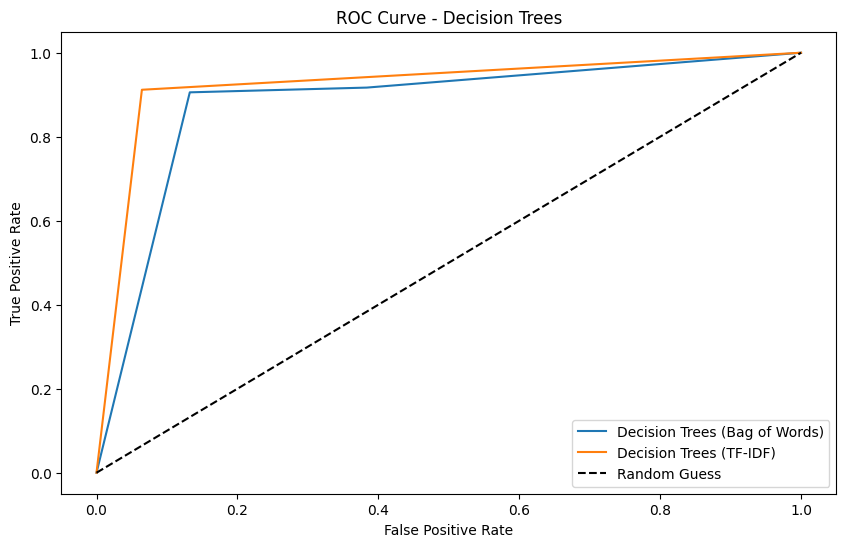

In [13]:
#Decision Trees:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Decision Trees with Bag of Words
precision_dt_bow = precision_score(y_test, y_pred_dt_bow)
recall_dt_bow = recall_score(y_test, y_pred_dt_bow)
f1_dt_bow = f1_score(y_test, y_pred_dt_bow)
conf_matrix_dt_bow = confusion_matrix(y_test, y_pred_dt_bow)
roc_auc_dt_bow = roc_auc_score(y_test, dt_classifier.predict_proba(X_test_bow)[:, 1])
fpr_dt_bow, tpr_dt_bow, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test_bow)[:, 1])

# Decision Trees with TF-IDF
precision_dt_tfidf = precision_score(y_test, y_pred_dt_tfidf)
recall_dt_tfidf = recall_score(y_test, y_pred_dt_tfidf)
f1_dt_tfidf = f1_score(y_test, y_pred_dt_tfidf)
conf_matrix_dt_tfidf = confusion_matrix(y_test, y_pred_dt_tfidf)
roc_auc_dt_tfidf = roc_auc_score(y_test, dt_classifier.predict_proba(X_test_tfidf)[:, 1])
fpr_dt_tfidf, tpr_dt_tfidf, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test_tfidf)[:, 1])

# Print the results
print("Decision Trees (Bag of Words) Metrics:")
print("Precision:", precision_dt_bow)
print("Recall:", recall_dt_bow)
print("F1 Score:", f1_dt_bow)
print("Confusion Matrix:\n", conf_matrix_dt_bow)
print("ROC-AUC:", roc_auc_dt_bow)

print("\nDecision Trees (TF-IDF) Metrics:")
print("Precision:", precision_dt_tfidf)
print("Recall:", recall_dt_tfidf)
print("F1 Score:", f1_dt_tfidf)
print("Confusion Matrix:\n", conf_matrix_dt_tfidf)
print("ROC-AUC:", roc_auc_dt_tfidf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt_bow, tpr_dt_bow, label="Decision Trees (Bag of Words)")
plt.plot(fpr_dt_tfidf, tpr_dt_tfidf, label="Decision Trees (TF-IDF)")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Trees')
plt.legend()
plt.show()


Random Forest (Bag of Words) Metrics:
Precision: 0.9309693663449433
Recall: 0.9097806028296084
F1 Score: 0.9202530332883958
Confusion Matrix:
 [[6143  329]
 [ 440 4437]]
ROC-AUC: 0.9746113318411667

Random Forest (TF-IDF) Metrics:
Precision: 0.9278825995807128
Recall: 0.9075251179003486
F1 Score: 0.9175909609204934
Confusion Matrix:
 [[6128  344]
 [ 451 4426]]
ROC-AUC: 0.9786242017157298


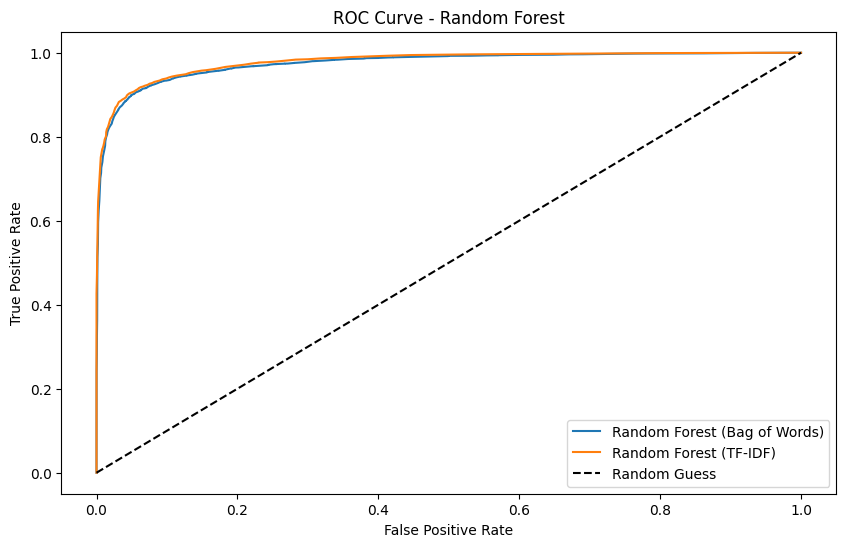

In [14]:
#Random Forest:

# Random Forest with Bag of Words
precision_rf_bow = precision_score(y_test, y_pred_rf_bow)
recall_rf_bow = recall_score(y_test, y_pred_rf_bow)
f1_rf_bow = f1_score(y_test, y_pred_rf_bow)
conf_matrix_rf_bow = confusion_matrix(y_test, y_pred_rf_bow)
roc_auc_rf_bow = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_bow)[:, 1])
fpr_rf_bow, tpr_rf_bow, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test_bow)[:, 1])

# Random Forest with TF-IDF
precision_rf_tfidf = precision_score(y_test, y_pred_rf_tfidf)
recall_rf_tfidf = recall_score(y_test, y_pred_rf_tfidf)
f1_rf_tfidf = f1_score(y_test, y_pred_rf_tfidf)
conf_matrix_rf_tfidf = confusion_matrix(y_test, y_pred_rf_tfidf)
roc_auc_rf_tfidf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_tfidf)[:, 1])
fpr_rf_tfidf, tpr_rf_tfidf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test_tfidf)[:, 1])

# Print the results
print("Random Forest (Bag of Words) Metrics:")
print("Precision:", precision_rf_bow)
print("Recall:", recall_rf_bow)
print("F1 Score:", f1_rf_bow)
print("Confusion Matrix:\n", conf_matrix_rf_bow)
print("ROC-AUC:", roc_auc_rf_bow)

print("\nRandom Forest (TF-IDF) Metrics:")
print("Precision:", precision_rf_tfidf)
print("Recall:", recall_rf_tfidf)
print("F1 Score:", f1_rf_tfidf)
print("Confusion Matrix:\n", conf_matrix_rf_tfidf)
print("ROC-AUC:", roc_auc_rf_tfidf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_bow, tpr_rf_bow, label="Random Forest (Bag of Words)")
plt.plot(fpr_rf_tfidf, tpr_rf_tfidf, label="Random Forest (TF-IDF)")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


Naive Bayes Model (Bag of Words) Metrics:
Precision: 0.8864081472777124
Recall: 0.9280295263481648
F1 Score: 0.9067414604828209
Confusion Matrix:
 [[5892  580]
 [ 351 4526]]
ROC-AUC: 0.970988321358066

Naive Bayes Model (TF-IDF) Metrics:
Precision: 0.9122807017543859
Recall: 0.8956325610006152
F1 Score: 0.9038799793067771
Confusion Matrix:
 [[6052  420]
 [ 509 4368]]
ROC-AUC: 0.9735246013616042


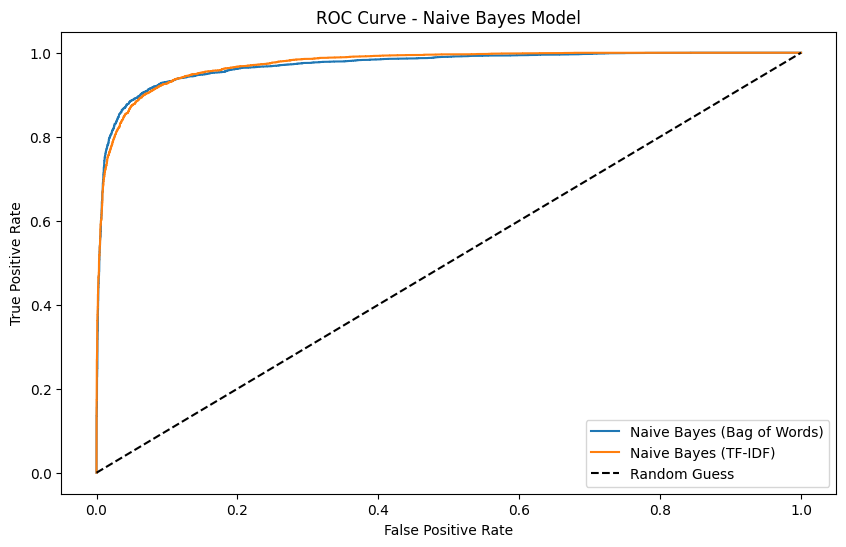

In [15]:
# Naive Bayes Model:

# Naive Bayes with Bag of Words
precision_nb_bow = precision_score(y_test, y_pred_nb_bow)
recall_nb_bow = recall_score(y_test, y_pred_nb_bow)
f1_nb_bow = f1_score(y_test, y_pred_nb_bow)
conf_matrix_nb_bow = confusion_matrix(y_test, y_pred_nb_bow)
roc_auc_nb_bow = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_bow)[:, 1])
fpr_nb_bow, tpr_nb_bow, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test_bow)[:, 1])

# Naive Bayes with TF-IDF
precision_nb_tfidf = precision_score(y_test, y_pred_nb_tfidf)
recall_nb_tfidf = recall_score(y_test, y_pred_nb_tfidf)
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf)
conf_matrix_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
roc_auc_nb_tfidf = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])
fpr_nb_tfidf, tpr_nb_tfidf, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test_tfidf)[:, 1])

# Print the results
print("Naive Bayes Model (Bag of Words) Metrics:")
print("Precision:", precision_nb_bow)
print("Recall:", recall_nb_bow)
print("F1 Score:", f1_nb_bow)
print("Confusion Matrix:\n", conf_matrix_nb_bow)
print("ROC-AUC:", roc_auc_nb_bow)

print("\nNaive Bayes Model (TF-IDF) Metrics:")
print("Precision:", precision_nb_tfidf)
print("Recall:", recall_nb_tfidf)
print("F1 Score:", f1_nb_tfidf)
print("Confusion Matrix:\n", conf_matrix_nb_tfidf)
print("ROC-AUC:", roc_auc_nb_tfidf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb_bow, tpr_nb_bow, label="Naive Bayes (Bag of Words)")
plt.plot(fpr_nb_tfidf, tpr_nb_tfidf, label="Naive Bayes (TF-IDF)")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Model')
plt.legend()
plt.show()


K-NN Classifier (Bag of Words) Metrics:
Precision: 0.9564315352697096
Recall: 0.7562025835554644
F1 Score: 0.8446123897858697
Confusion Matrix:
 [[6304  168]
 [1189 3688]]
ROC-AUC: 0.9407197022019809

K-NN Classifier (TF-IDF) Metrics:
Precision: 0.968
Recall: 0.0992413368874308
F1 Score: 0.1800260368235075
Confusion Matrix:
 [[6456   16]
 [4393  484]]
ROC-AUC: 0.6268036085731239


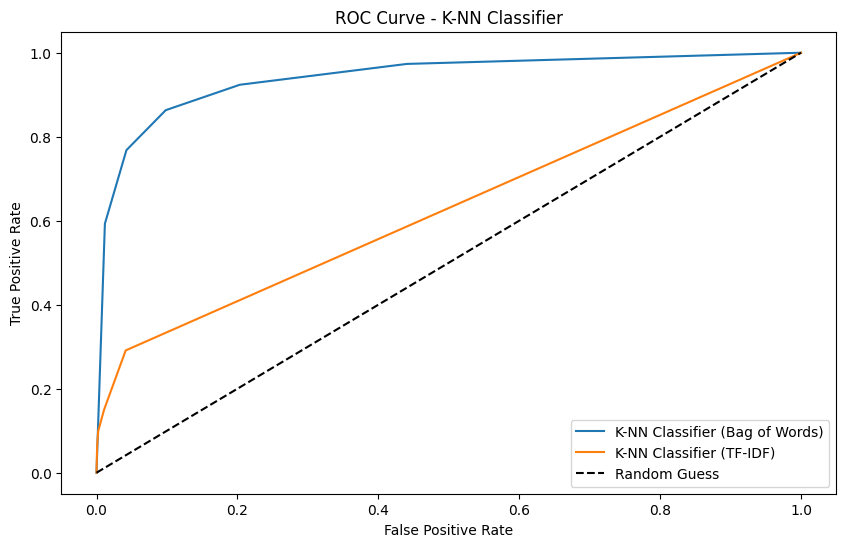

In [16]:
#K-NN Classifier:

# K-NN Classifier with Bag of Words
precision_knn_bow = precision_score(y_test, y_pred_knn_bow)
recall_knn_bow = recall_score(y_test, y_pred_knn_bow)
f1_knn_bow = f1_score(y_test, y_pred_knn_bow)
conf_matrix_knn_bow = confusion_matrix(y_test, y_pred_knn_bow)
roc_auc_knn_bow = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_bow)[:, 1])
fpr_knn_bow, tpr_knn_bow, _ = roc_curve(y_test, knn_classifier.predict_proba(X_test_bow)[:, 1])

# K-NN Classifier with TF-IDF
precision_knn_tfidf = precision_score(y_test, y_pred_knn_tfidf)
recall_knn_tfidf = recall_score(y_test, y_pred_knn_tfidf)
f1_knn_tfidf = f1_score(y_test, y_pred_knn_tfidf)
conf_matrix_knn_tfidf = confusion_matrix(y_test, y_pred_knn_tfidf)
roc_auc_knn_tfidf = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_tfidf)[:, 1])
fpr_knn_tfidf, tpr_knn_tfidf, _ = roc_curve(y_test, knn_classifier.predict_proba(X_test_tfidf)[:, 1])

# Print the results
print("K-NN Classifier (Bag of Words) Metrics:")
print("Precision:", precision_knn_bow)
print("Recall:", recall_knn_bow)
print("F1 Score:", f1_knn_bow)
print("Confusion Matrix:\n", conf_matrix_knn_bow)
print("ROC-AUC:", roc_auc_knn_bow)

print("\nK-NN Classifier (TF-IDF) Metrics:")
print("Precision:", precision_knn_tfidf)
print("Recall:", recall_knn_tfidf)
print("F1 Score:", f1_knn_tfidf)
print("Confusion Matrix:\n", conf_matrix_knn_tfidf)
print("ROC-AUC:", roc_auc_knn_tfidf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn_bow, tpr_knn_bow, label="K-NN Classifier (Bag of Words)")
plt.plot(fpr_knn_tfidf, tpr_knn_tfidf, label="K-NN Classifier (TF-IDF)")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-NN Classifier')
plt.legend()
plt.show()


SVM Classifier (Bag of Words) Metrics:
Precision: 0.9644613321412606
Recall: 0.8847652245232726
F1 Score: 0.9228959469575447
Confusion Matrix:
 [[6313  159]
 [ 562 4315]]
ROC-AUC: 0.9473414032162775

SVM Classifier (TF-IDF) Metrics:
Precision: 0.9612249394139678
Recall: 0.8946073405782243
F1 Score: 0.9267204757858964
Confusion Matrix:
 [[6296  176]
 [ 514 4363]]
ROC-AUC: 0.9826334440334832


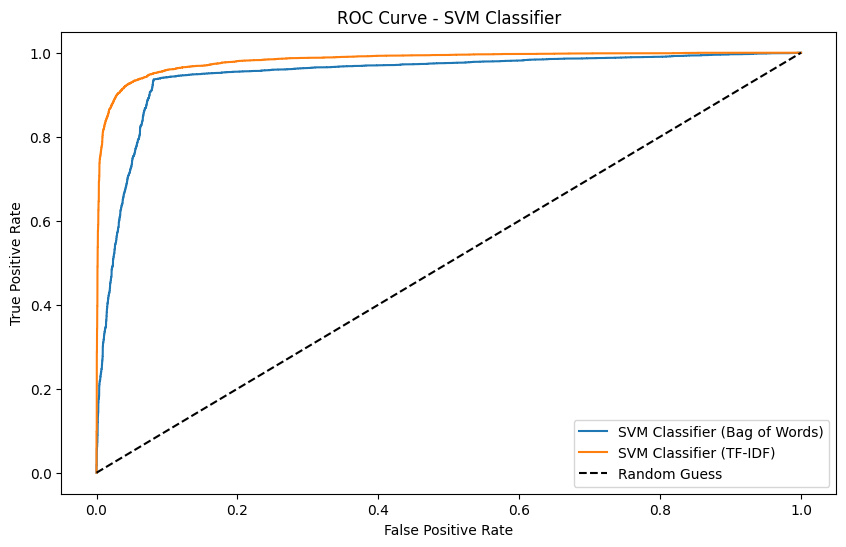

In [17]:
#SVM (Support Vector Machine):

# SVM Classifier with Bag of Words
precision_svm_bow = precision_score(y_test, y_pred_svm_bow)
recall_svm_bow = recall_score(y_test, y_pred_svm_bow)
f1_svm_bow = f1_score(y_test, y_pred_svm_bow)
conf_matrix_svm_bow = confusion_matrix(y_test, y_pred_svm_bow)
roc_auc_svm_bow = roc_auc_score(y_test, svm_classifier.decision_function(X_test_bow))
fpr_svm_bow, tpr_svm_bow, _ = roc_curve(y_test, svm_classifier.decision_function(X_test_bow))

# SVM Classifier with TF-IDF
precision_svm_tfidf = precision_score(y_test, y_pred_svm_tfidf)
recall_svm_tfidf = recall_score(y_test, y_pred_svm_tfidf)
f1_svm_tfidf = f1_score(y_test, y_pred_svm_tfidf)
conf_matrix_svm_tfidf = confusion_matrix(y_test, y_pred_svm_tfidf)
roc_auc_svm_tfidf = roc_auc_score(y_test, svm_classifier.decision_function(X_test_tfidf))
fpr_svm_tfidf, tpr_svm_tfidf, _ = roc_curve(y_test, svm_classifier.decision_function(X_test_tfidf))

# Print the results
print("SVM Classifier (Bag of Words) Metrics:")
print("Precision:", precision_svm_bow)
print("Recall:", recall_svm_bow)
print("F1 Score:", f1_svm_bow)
print("Confusion Matrix:\n", conf_matrix_svm_bow)
print("ROC-AUC:", roc_auc_svm_bow)

print("\nSVM Classifier (TF-IDF) Metrics:")
print("Precision:", precision_svm_tfidf)
print("Recall:", recall_svm_tfidf)
print("F1 Score:", f1_svm_tfidf)
print("Confusion Matrix:\n", conf_matrix_svm_tfidf)
print("ROC-AUC:", roc_auc_svm_tfidf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm_bow, tpr_svm_bow, label="SVM Classifier (Bag of Words)")
plt.plot(fpr_svm_tfidf, tpr_svm_tfidf, label="SVM Classifier (TF-IDF)")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend()
plt.show()


The above code snippets will calculate and display the Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC Curve for each of the mentioned prediction methods using both Bag of Words and TF-IDF features. The ROC curves will also be plotted for better visualization of the model's performance.